In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("Crop_recommendation.csv")
df['label'] = df['label'].astype('category')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

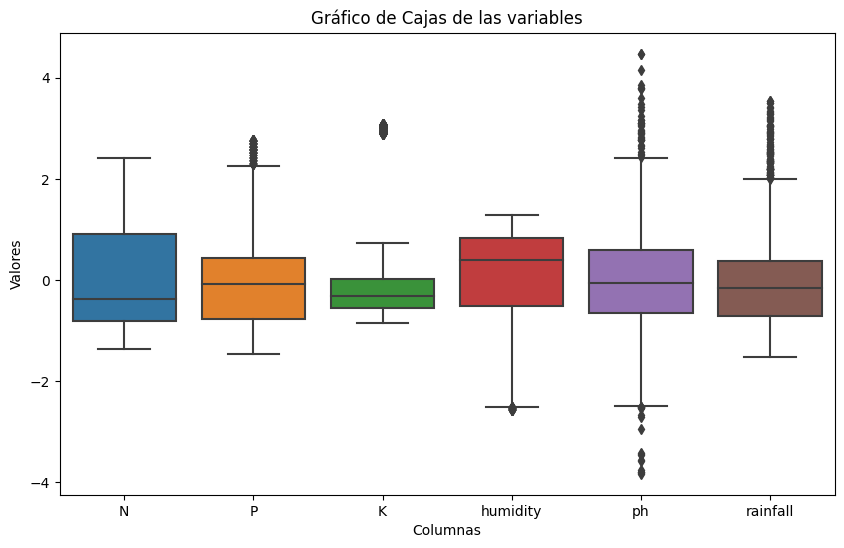

In [ ]:
variables = ['N', 'P','K', 'humidity', 'ph', 'rainfall']

# Crea un gráfico de cajas utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.boxplot(data=df_std[variables])
plt.title('Gráfico de Cajas de las variables')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

PCA

In [ ]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0)

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


In [ ]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


In [ ]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [ ]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


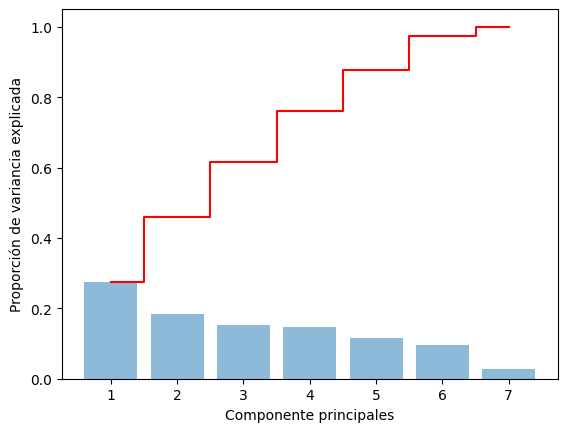

In [ ]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

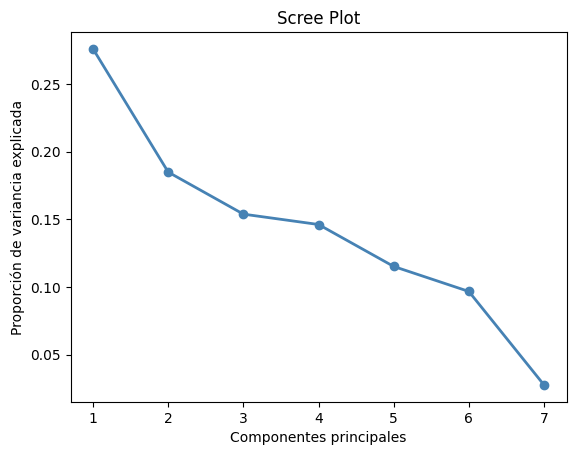

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

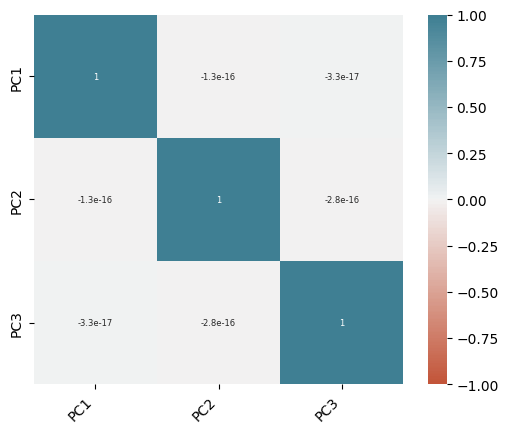

In [ ]:
corr = pca_df[['PC1', 'PC2', 'PC3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [ ]:
features = df.drop(columns=['label']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'})
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature,
    )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

ISOMAP

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap_df = Isomap(n_neighbors=6, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=15)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=5)
fig.show()

K means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:


data = df.drop('label', axis=1)

data.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
!pip install gap-stat

In [ ]:
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
import matplotlib.pyplot as plt


optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(data, cluster_array=np.arange(1, 30))


print(f"El valor óptimo de k es: {n_clusters}")



El valor óptimo de k es: 29


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data)


labels = kmeans.labels_


centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



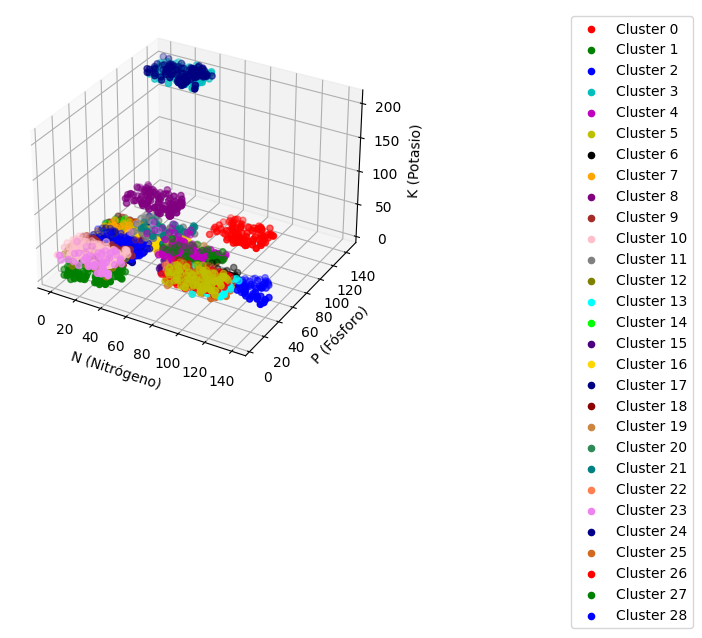

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'indigo', 'gold', 'navy', 'darkred', 'peru', 'seagreen', 'teal', 'coral', 'violet', 'darkblue', 'chocolate']


unique_labels = np.unique(labels)

for i, cluster_id in enumerate(unique_labels):

    data_cluster = data[labels == cluster_id]


    N = data_cluster['N']
    P = data_cluster['P']
    K = data_cluster['K']


    color = colors[i % len(colors)]


    ax.scatter(N, P, K, c=color, label=f'Cluster {cluster_id}')


ax.set_xlabel('N (Nitrógeno)')
ax.set_ylabel('P (Fósforo)')
ax.set_zlabel('K (Potasio)')

ax.legend(loc='upper left', bbox_to_anchor=(1.5, 1))


plt.show()

clustering jerarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

Z = linkage(X_scaled, "ward")


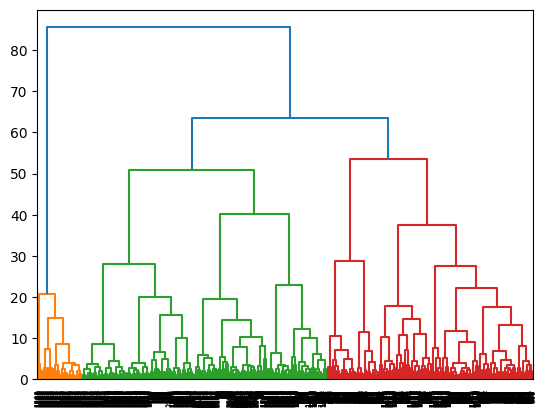

In [ ]:
dendrogram(Z)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score


clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clusterer.fit_predict(data)


silhouette_avg = silhouette_score(data, cluster_labels)



clusterer = AgglomerativeClustering(n_clusters=num_clases, linkage='ward')
cluster_labels = clusterer.fit_predict(data)


silhouette = silhouette_score(data, cluster_labels)


print(f"Score de Silhouette para {n_clusters} clusters: {silhouette_avg}")
print(f"Score de Silhouette para {num_clases} clusters: {silhouette}")

Score de Silhouette para 29 clusters: 0.38878208311671025
Score de Silhouette para 21 clusters: 0.39828839739353084
